# Making Plots With ggplot (aka plotnine)

*Estimated teaching time:* 40 min

*Estimated challenge time:* 50 min

*Key questions:*

  - " How can I visualize data in Python ?"
  - " What is 'grammar of graphics' ?"
    
*Learning objectives:*

  - "Familiarise yourself with The Grammar of Graphics through plotinine library"
  - "Create a ggplot object."
  - "Explore different geom objects"
  - "Explore other layers of ggplot, including themes and labels"

*Key points:*

  - "plotnine is python implementation of The Gramma of Graphics"
  - "ggplot is a set of gramma rules to make publication quality plots"
  - "ggplot has idea of layer, building a plot is just adding different layers together"

## Introduction

Python has powerful built-in plotting capabilities such as [`matplotlib`](https://matplotlib.org/), but with great power comes great complexity. For this exercise, we are going to use different python library, [`plotnine`](https://plotnine.readthedocs.io/en/stable/). There are a number of different libraries to choose from, but we are setting on [`plotnine`](https://plotnine.readthedocs.io/en/stable) as this is python port of original [`ggplot2`](http://ggplot2.org/) an R library (package), which is a very nice way to create publication quality plots and syntax is preserved, meaning you can take your python ggplot code and run it in R if you want it.
Strictly speaking [`plotnine`](https://plotnine.readthedocs.io/en/stable/) is just another implementation of [The Grammar of Graphics](http://link.springer.com/book/10.1007%2F0-387-28695-0) by Leland Wilkinson, which in theory could go on it own direction and diverge away from an R `ggplot` .

#### The Grammar of Graphics

> statistical graphic is a mapping from data to aesthetic attributes (colour, shape, size) of geometric objects (points, lines, bars)
> Faceting can be used to generate the same plot for different subsets of the dataset

These are basic building blocks according to the grammar of graphics:

- **data** The data + a set of aesthetic mappings that describing variables mapping
- **geom** Geometric objects, represent what you actually see on the plot: points, lines, polygons, etc.
- **stats** Statistical transformations, summarise data in many useful ways.
- **scale** The scales map values in the data space to values in an aesthetic space
- **coord** A coordinate system, describes how data coordinates are mapped to the plane of the graphic.
- **facet** A faceting specification describes how to break up the data into subsets for plotting individual set

Let's explore those in details

First, install the `pandas` and `plotnine` packages to ensure they are available.

In [2]:
!pip install pandas plotnine

  Using cached https://files.pythonhosted.org/packages/3a/68/cf39dfde4e9fd886703621e3393cd8103cb48d5ecc95b8f048ec148e53a6/plotnine-0.3.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5d/eb/92c4b45ca47a2dd1339c958636e083b50ffadb5162a599a1cbbe92f89832/patsy-0.5.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/52/01/8a3b4c6e45749674a1e5241174b4b63cd6435125e124bec275f3e02c96ac/mizani-0.4.6-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/29/df/1f8233500d8bb90f16fd066560f3805197e568af611ca97eddd5fb81b012/statsmodels-0.9.0-cp36-cp36m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/56/8a/84537c0354f0d1f03bf644b71bf8e0a50db9c1294181905721a5f3efbf66/palettable-3.1.1-py2.py3-none-any.whl
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install -

In [1]:
# We run this to suppress various deprecation warnings from plotnine - keeps our notebook cleaner
import warnings
warnings.filterwarnings('ignore')

# Plotting in ggplot style

Let set up our working environment with necessary libraries and also load our csv file into data frame called `survs_df`,

In [2]:
import numpy as np
import pandas as pd
from plotnine import *

%matplotlib inline
survs_df = pd.read_csv('data/surveys.csv').dropna()


Producing a plot with ggplot, we must give three things:

1. A data frame containing our data.
2. How the columns of the data frame can be translated into positions, colors, sizes, and shapes of graphical elements ("aesthetics").
3. The actual graphical elements to display ("geometric objects").



## Introduction to plotting



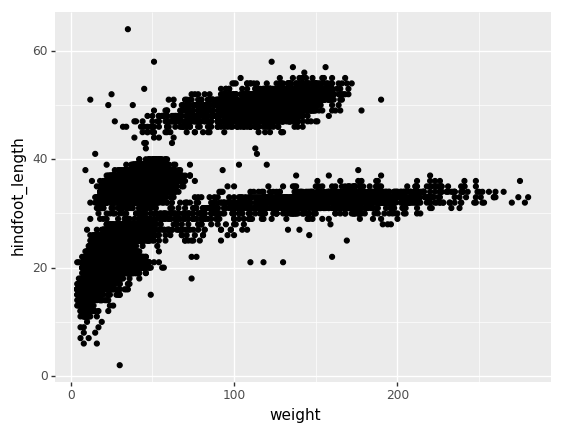

<ggplot: (-9223372036570493913)>

In [3]:
ggplot(survs_df, aes('weight', 'hindfoot_length')) + geom_point()


Lets see if we can also include information about species and year



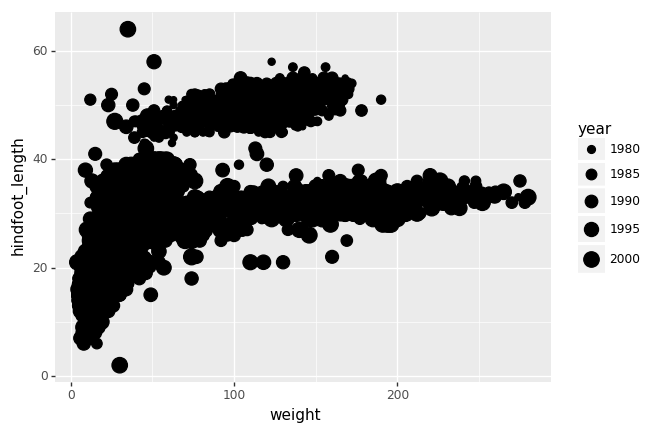

<ggplot: (-9223372036564118854)>

In [4]:
ggplot(survs_df, aes('weight', 'hindfoot_length',
    size = 'year')) + geom_point()

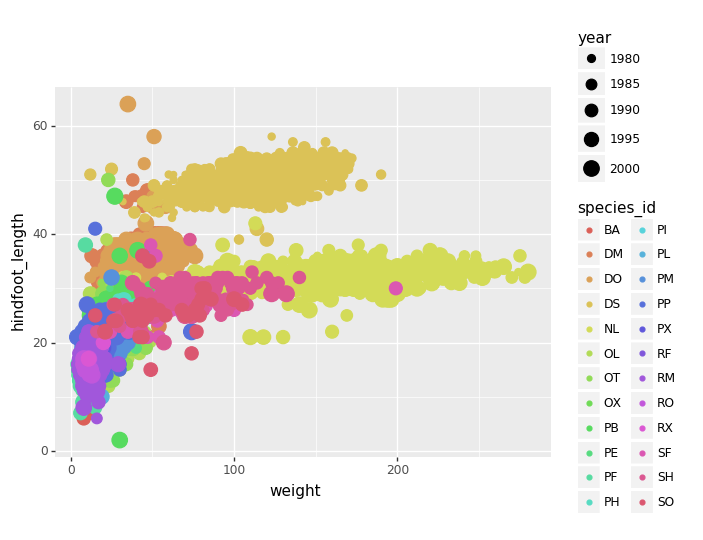

<ggplot: (290734926)>

In [6]:
ggplot(survs_df, aes('weight', 'hindfoot_length', 
    size = 'year', color = 'species_id')) + geom_point()


We can do simple counting plot, to see how many observation (data points) we have for each year for example



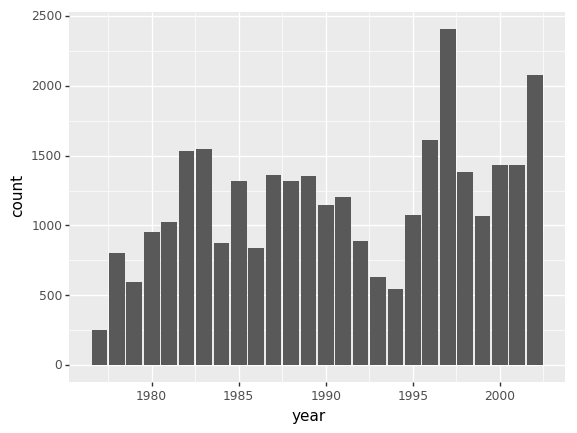

<ggplot: (-9223372036560672042)>

In [7]:
ggplot(survs_df, aes('year')) + \
    geom_bar(stat = 'count')


Let's now also color by species to see how many observation we have per species in a given year



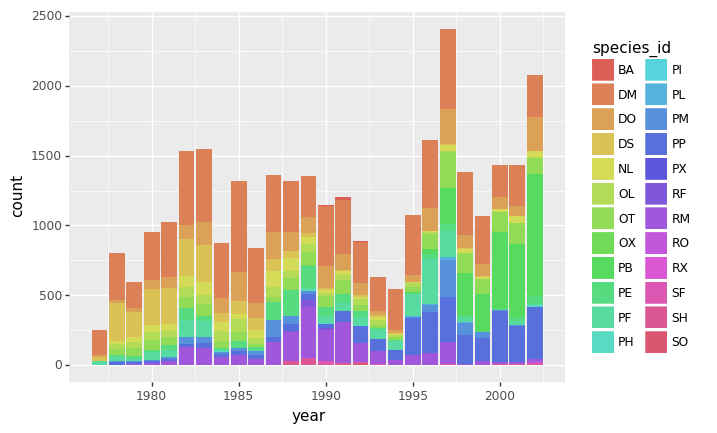

<ggplot: (292842693)>

In [8]:
ggplot(survs_df, aes('year', fill = 'species_id')) + \
    geom_bar(stat = 'count')

## Challenges

> Is there a better visualisation for comparing weight across years? The plot should have categorical data on x axis and continuous on y axis
> Plot a boxplot of `hindfoot_length` across different species (`species_id` column)



## More geom types



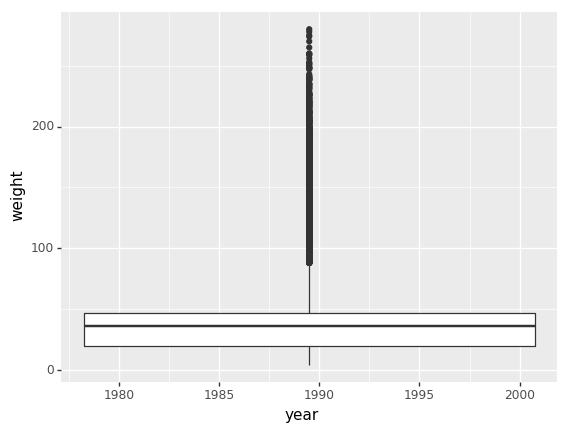

<ggplot: (-9223372036560334511)>

In [5]:
ggplot(survs_df, aes('year', 'weight')) + \
    geom_boxplot()

    
Why are we not seeing mulitple boxplots, one for each year?
This is because year variable is continues in our data frame, but for the purpose we want it to be categorical.



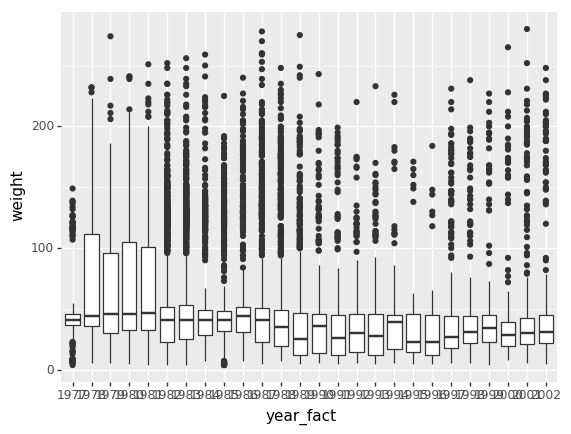

<ggplot: (-9223372036564040823)>

In [9]:
survs_df['year_fact'] = pd.Series(survs_df['year'], dtype = "category")

ggplot(survs_df, aes('year_fact', 'weight')) + \
    geom_boxplot()

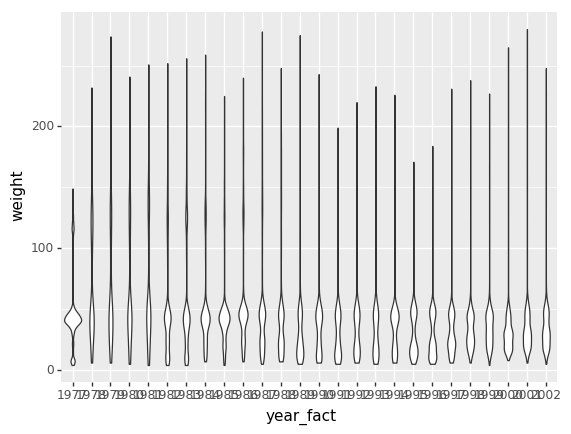

<ggplot: (291756278)>

In [10]:
ggplot(survs_df, aes('year_fact', 'weight')) + \
    geom_violin()


To save an image for later



In [11]:
plt1 = ggplot(survs_df, aes('year_fact', 'weight')) + \
           geom_boxplot() + \
           xlab("Years") + \
           ylab("Weight log2(kg)") + \
           ggtitle("Boxplots, summary of species wieght in each year")

ggsave(filename = "plot1.png", \
       plot = plt1, \
       device = 'png', \
       dpi = 300, \
       height = 25, \
        width = 25)

/Users/perry/.virtualenvs/jupyter/lib/python3.6/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 25 x 25 in image.
  from_inches(height, units), units))
/Users/perry/.virtualenvs/jupyter/lib/python3.6/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: plot1.png
  warn('Filename: {}'.format(filename))


## Challenges

> Can you log2 transform `weight` and plot "normalised" boxplot. Hint: use `np.log2()` function and name new column `weight_log`

Also will log2 transforming make this data visualisation better? 



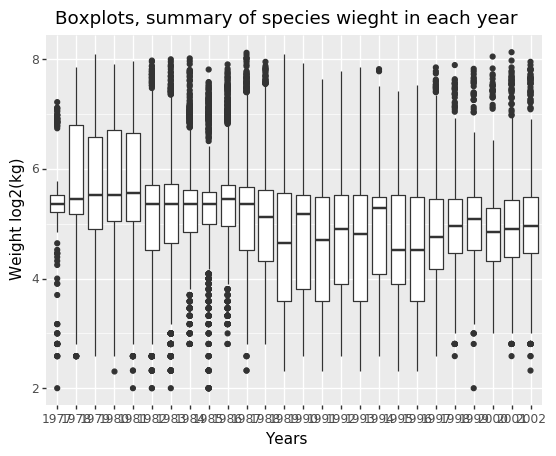

<ggplot: (-9223372036561243020)>

In [12]:
survs_df['weight_log'] = np.log2(survs_df['weight'])
    
ggplot(survs_df, aes('year_fact', 'weight_log')) + \
    geom_boxplot() + \
    xlab("Years") + \
    ylab("Weight log2(kg)") + \
    ggtitle("Boxplots, summary of species wieght in each year")

## Faceting

ggplot has a special technique called *faceting* that allows to split one plot
into multiple plots based on a factor included in the dataset. We will use it to
make one plot for a time series for each species.



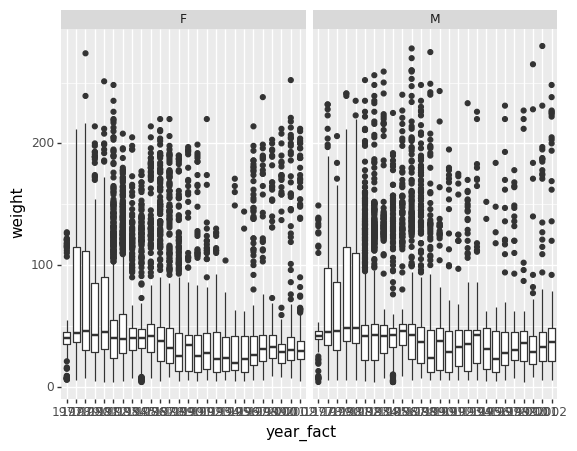

<ggplot: (295396416)>

In [13]:
ggplot(survs_df, aes('year_fact', 'weight')) + \
    geom_boxplot() + \
    facet_wrap("~sex")

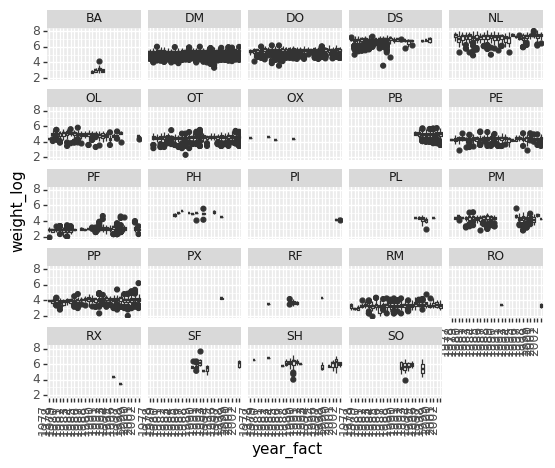

<ggplot: (291130902)>

In [14]:
ggplot(survs_df, aes('year_fact', 'weight_log')) + \
    geom_boxplot() + \
    theme(axis_text_x = element_text(angle = 90, hjust = 1)) + \
    facet_wrap("~species_id") 

## Theming



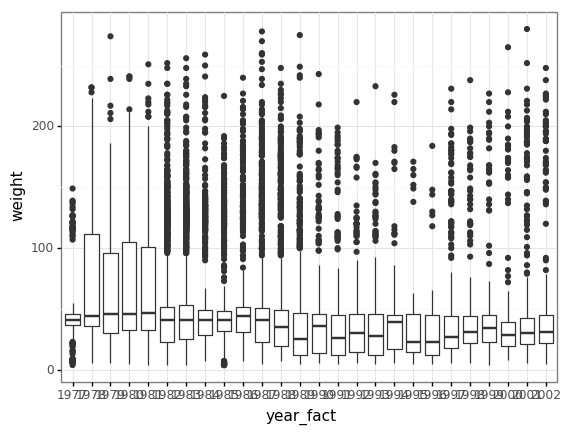

<ggplot: (-9223372036562395020)>

In [15]:
ggplot(survs_df, aes('year_fact', 'weight')) + \
    geom_boxplot() + \
    theme_bw()

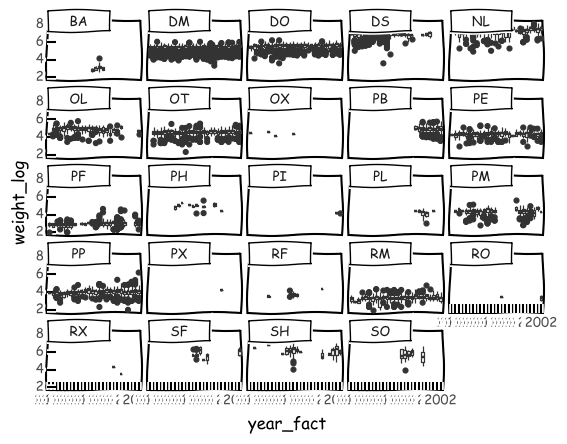

<ggplot: (-9223372036571251214)>

In [16]:
ggplot(survs_df, aes('year_fact', 'weight_log')) + \
    geom_boxplot() + \
    theme(axis_text_x = element_text(angle = 90, hjust = 1)) + \
    facet_wrap("~species_id") + \
    theme_xkcd()

## Extra bits 1

Let's try to bin years into decades, which could be crude but might gives simple images to look at.



In [17]:
bins = [(survs_df['year'] < 1980),
        (survs_df['year'] < 1990),
        (survs_df['year'] < 2000),
        (survs_df['year'] >= 2000)]

labels = ['70s', '80s', '90s', 'Z']

survs_df['year_bins'] = np.select(bins, labels)

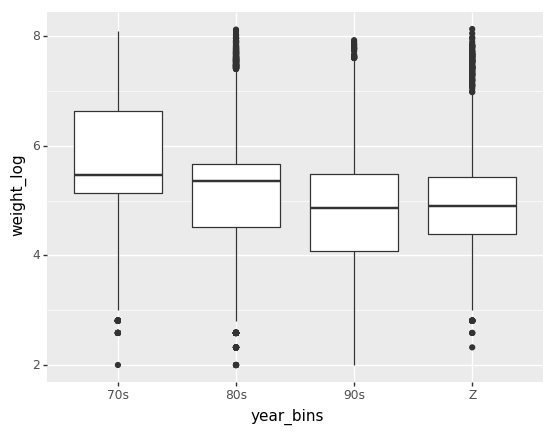

<ggplot: (-9223372036561922023)>

In [21]:
plt2 = ggplot(survs_df, aes('year_bins', 'weight_log')) + \
           geom_boxplot()
plt2

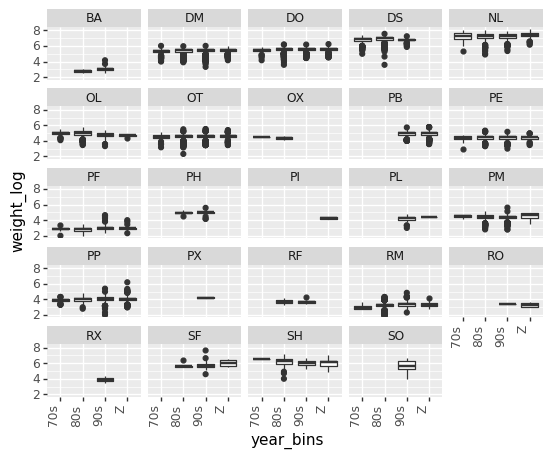

<ggplot: (291985405)>

In [22]:
plt2 = ggplot(survs_df, aes('year_bins', 'weight_log')) + \
           geom_boxplot() + \
           theme(axis_text_x = element_text(angle = 90, hjust = 1)) + \
           facet_wrap("~species_id") 
plt2

## Extra bits 2

This is a different way to look at your data



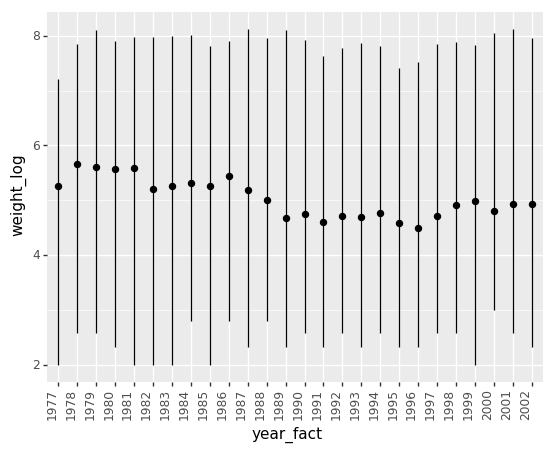

<ggplot: (293317878)>

In [23]:
ggplot(survs_df, aes("year_fact", "weight")) + \
    stat_summary(fun_y = np.mean, fun_ymin=np.min, fun_ymax=np.max) + \
    theme(axis_text_x = element_text(angle = 90, hjust = 1))
    
ggplot(survs_df, aes("year_fact", "weight")) + \
    stat_summary(fun_y = np.median, fun_ymin=np.min, fun_ymax=np.max) + \
    theme(axis_text_x = element_text(angle = 90, hjust = 1))
    
ggplot(survs_df, aes("year_fact", "weight_log")) + \
    stat_summary(fun_y = np.mean, fun_ymin=np.min, fun_ymax=np.max) + \
    theme(axis_text_x = element_text(angle = 90, hjust = 1))

## Extra bits 3

It is very informative to look across years, year by year, it becomes apparent straight away that for some species there is a lot of data is missing.And going forward, maybe, you'd want to filter those low counting species. (this is after faceting by `species_id` in section [Extra bits 1](#extra-bits-1)).



In [25]:
#survs_cnts_df = survs_df.groupby(['species_id'], as_index=False).count().sort_values(['record_id'])
survs_cnts_df = survs_df[['species_id']].groupby(['species_id']).size().reset_index()
species_to_remove = list(survs_cnts_df[survs_cnts_df['record_id'] < 200].species_id)
survs_df_filt = survs_df[survs_df['species_id'].isin(species_to_remove) == False]

KeyError: 'record_id'

In [26]:
ggplot(survs_df_filt, aes('year_fact', 'weight_log')) + \
    geom_boxplot() + \
    theme(axis_text_x = element_text(angle = 90, hjust = 1))

ggplot(survs_df_filt, aes('year_fact', 'weight_log')) + \
    geom_boxplot() + \
    theme(axis_text_x = element_text(angle = 90, hjust = 1)) + \
    facet_wrap("~species_id")

NameError: name 'survs_df_filt' is not defined